In [ ]:
## Extending the Dataframe by Quantitative Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [117]:
# clean data differently

In [2]:
data = pd.read_csv(r'../data/mbti_1.csv')

In [4]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
import re

def var_posts(string):
    lengths = []
    for post in string:
        pattern2 = '\w{1,}'
        bag = re.findall(pattern2, post)
        count_post = len(bag)
        lengths.append(count_post)
    return np.var(lengths)

In [6]:
# average number of words per scentence

# std number of words per scentence

# number of adjectives used, dictionairy import, english dict of adj

# number of commas in a scentence


data['length_comment'] = data['posts'].apply(lambda x: len(x.split())/50)
data['var_length'] = data['posts'].apply(lambda x: var_posts(x))
data['links_count'] = data['posts'].apply(lambda x: x.count('http')/50)
data['qm_count'] = data['posts'].apply(lambda x: x.count('?')/50)
data['exm_count'] = data['posts'].apply(lambda x: x.count('!')/50) # normalize by the amount of scentences/ percent of number of scentences
data['img_count'] = data['posts'].apply(lambda x: x.count('jpg')/50)
# data['music_count'] = data['posts'].apply(lambda x: x.count('music')/50)
data['dots_count'] = data['posts'].apply(lambda x: x.count('...')/50)
data['ht_count'] = data['posts'].apply(lambda x: x.count('#')/50)
data['me_count'] = data['posts'].apply(lambda x: (x.lower.count('me') + x.lower.count('i') + x.lower.count('myself'))/50) # add uppercase

data.head()

,type,posts,length_comment,var_length,links_count,qm_count,exm_count,img_count,music_count,dots_count,ht_count,me_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.179750,0.48,0.36,0.06,0.12,0.02,0.30,0.0,1.18
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.184469,0.20,0.10,0.00,0.02,0.00,0.38,0.0,3.06
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.184010,0.10,0.24,0.08,0.00,0.00,0.26,0.0,1.44
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.186640,0.04,0.22,0.06,0.00,0.02,0.52,0.0,2.18
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.178723,0.12,0.20,0.02,0.04,0.02,0.42,0.0,1.48


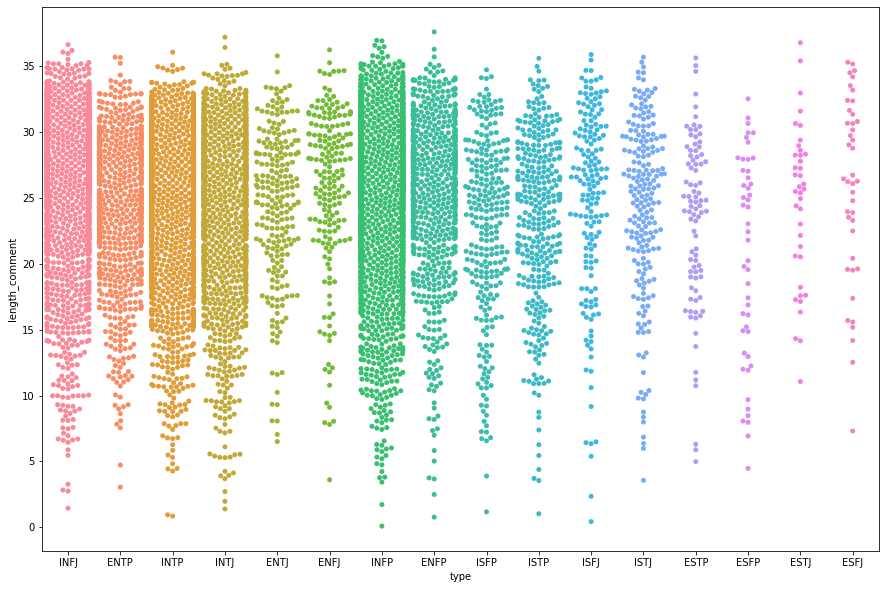

In [7]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "length_comment", data=data)

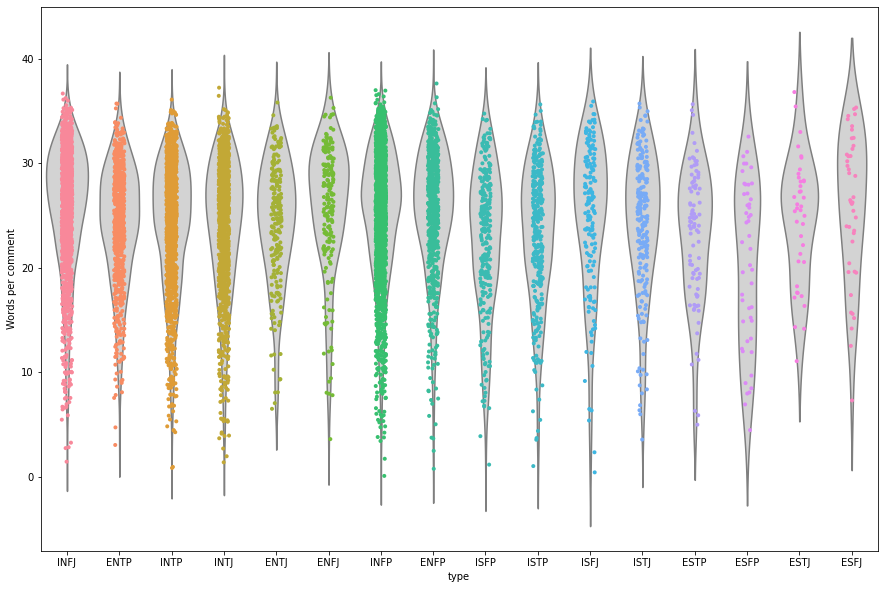

In [8]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='length_comment', data=data, inner=None, color='lightgray')
sns.stripplot(x='type', y='length_comment', data=data, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

<Figure size 1080x720 with 0 Axes>

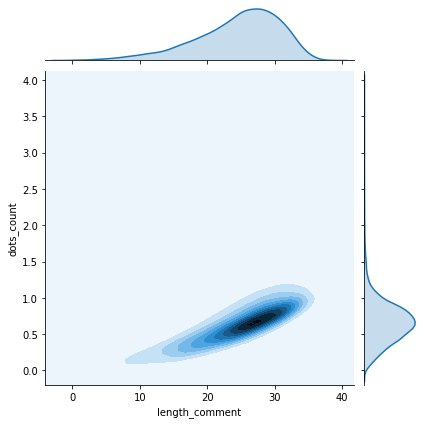

In [9]:
plt.figure(figsize=(15,10))
sns.jointplot(x='length_comment', y='dots_count', data=data, kind='kde')
plt.show()


<Figure size 1080x720 with 0 Axes>

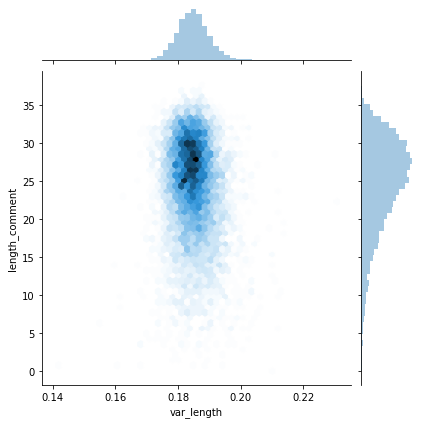

In [10]:
plt.figure(figsize=(15,10))
sns.jointplot("var_length", "length_comment", data=data, kind="hex")

In [11]:
data = data.drop(columns = 'posts')

In [12]:
data.head()

,type,length_comment,var_length,links_count,qm_count,exm_count,img_count,music_count,dots_count,ht_count,me_count
0,INFJ,11.12,0.179750,0.48,0.36,0.06,0.12,0.02,0.30,0.0,1.18
1,ENTP,23.40,0.184469,0.20,0.10,0.00,0.02,0.00,0.38,0.0,3.06
2,INTP,16.72,0.184010,0.10,0.24,0.08,0.00,0.00,0.26,0.0,1.44
3,INTJ,21.28,0.186640,0.04,0.22,0.06,0.00,0.02,0.52,0.0,2.18
4,ENTJ,19.34,0.178723,0.12,0.20,0.02,0.04,0.02,0.42,0.0,1.48


In [13]:
data.ht_count.value_counts()

0.00    7818
0.02     641
0.04     123
0.06      43
0.08      29
0.12       8
0.10       8
0.14       2
0.20       1
0.16       1
0.34       1
Name: ht_count, dtype: int64

In [14]:
data['I-E'] = data['type'].astype(str).str[0]
data['N-S'] = data['type'].astype(str).str[1]
data['T-F'] = data['type'].astype(str).str[2]
data['J-P'] = data['type'].astype(str).str[3]



In [16]:
data['I-E'] = data['I-E'].astype('category')
data['N-S'] = data['N-S'].astype('category')
data['T-F'] = data['T-F'].astype('category')
data['J-P'] = data['J-P'].astype('category')

cat_columns = data.select_dtypes(['category']).columns

data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [17]:
data.head()

,type,length_comment,var_length,links_count,qm_count,exm_count,img_count,music_count,dots_count,ht_count,me_count,I-E,N-S,T-F,J-P
0,INFJ,11.12,0.179750,0.48,0.36,0.06,0.12,0.02,0.30,0.0,1.18,1,0,0,0
1,ENTP,23.40,0.184469,0.20,0.10,0.00,0.02,0.00,0.38,0.0,3.06,0,0,1,1
2,INTP,16.72,0.184010,0.10,0.24,0.08,0.00,0.00,0.26,0.0,1.44,1,0,1,1
3,INTJ,21.28,0.186640,0.04,0.22,0.06,0.00,0.02,0.52,0.0,2.18,1,0,1,0
4,ENTJ,19.34,0.178723,0.12,0.20,0.02,0.04,0.02,0.42,0.0,1.48,0,0,1,0


In [18]:
data.to_csv(r'../data/quant_personalities.csv')